# 画像の算術演算

## 画像の足し算

画像の足し算は、以下の方法があります。

- OpenCVの関数 cv2.add() を使う
- Numpyの処理によってビット数、データ型が同じ2枚の画像を res = img1 + img2 と足す
- res = img + value のように画像全体を明るくする


Note：

OpenCVとNumpyの足し算は和の値が画素値の上限値を超えた時の処理が異なります。  

OpenCVの cv2.add() 関数を使った場合、上限値を超える和の値は res = min(img1+img2, MAX)\`\`の ように打ち切られます。  
一方でNumpyの足し算はモジュロを取った値に ``res = (img1+img2) mod MAX となります。

以下の例を見てみましょう:

\>\>\> x = np.uint8([250])
\>\>\> y = np.uint8([10])

\>\>\> print cv2.add(x,y) # 250+10 = 260 => 255
[[255]]

\>\>\> print x+y          # 250+10 = 260 % 256 = 4
[4]

この現象は2枚の画像を足し合わせた時によりはっきり確認できます。  
OpenCVの足し算を使った方がよい結果になるのでOpenCVの関数を使うと良いでしょう。

\\画像のブレンド

この例も画像の足し算ですが、各画像に異なる重み付けした足し算をするため画像のブレンディングや透明度を設定しているかのように感じるでしょう。  

画像は以下のように足し合わされます :

g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x)

上の式の \alpha の値を 0 \rightarrow 1 に変更すると，画像 f_{0} からもう一つの画像 f_{1} へ徐々に変化していくのが分かります。

ここでは2枚の画像のブレンディングをしました。
まずは1枚目の画像の重みを0.7、2枚目の画像の重みを0.3に設定し、cv2.addWeighted() 関数を使って以下の計算を行います。

dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma

以下の例では \gamma の値を0に設定しています。

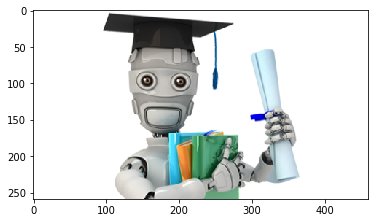

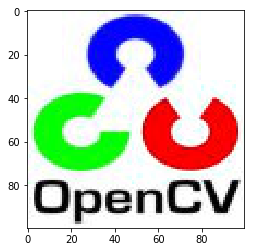

error: OpenCV(3.4.1) D:\Build\OpenCV\opencv-3.4.1\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op


In [22]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv_logo.jpg')

plt.imshow(img1),plt.show()
plt.imshow(img2),plt.show()

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ビット単位での処理

OpenCVが提供するビット単位での処理には AND, OR, NOT とXORがある。  
これらの関数は、画像中から特定の領域を抽出する時や非長方形な注目領域を定義したり、注目領域にのみ処理を実行したい時に便利です。  

下に示す例では画像中の特定領域のみを変える方法を示します。この例では画像上にOpenCVのロゴを表示します。  

2枚の画像を単純に足し算するとロゴの色が変わったり、ブレンドをするとロゴが透けたりしますが、ロゴを元の画像のように表示したいわけです。  
ロゴが占める領域が完璧な長方形であれば注目領域(ROI)を指定するだけで済みますが、OpenCVのロゴは長方形とはほど遠い形状をしています。  

このような時はビット単位での処理を使います:

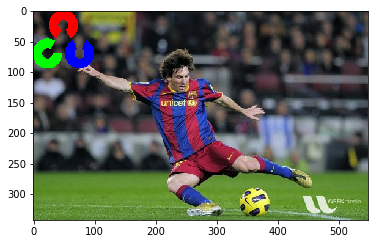

(<matplotlib.image.AxesImage at 0x1134fea5240>, None)

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Load images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('mini-logo.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.show()